In [2]:
import pandas as pd

merged_results = pd.read_excel('all_merged_data.xlsx')

In [3]:
nutrient_mask = merged_results['Gene'].isin(['E18304', 'E18304', 'E03410', 'D02783', 'E27742', 'E07942', 'E10087', 'F21923', 'C19151'])
nutrient = merged_results[nutrient_mask]

'''uniform_dereg["order"] = uniform_dereg.iloc[:, 4:13].mean(axis=1)
uniform_dereg = uniform_dereg.sort_values(by='order')'''

print(nutrient)


     Unnamed: 0    Gene TF number Assigned name  scSoA  scYFP  inYFP  scTlG  \
42           42  E07942     TF042          MIG1   0.24   0.19    0.0    0.0   
64           64  E18304     TF127        ERT1-1   0.26   0.00    0.0    0.0   
74           74  E27742     TF091          GCN4   0.00   0.31    0.0    0.0   
98           98  E03410     TF040        ERT1-2   0.00   0.00    0.0    0.0   
125         125  F21923     TF116          ADR1   0.00   0.00    0.0    0.0   
126         126  E10087     TF117             -   0.00   0.00    0.0    0.0   
127         127  D02783     TF118         DAL81   0.00   0.00    0.0    0.0   
130         130  C19151     TF122          CAT8   0.00   0.00    0.0    0.0   

     scYFP_HAC1  OE_rProt_total  OE_rProt_normalized  KO_inRedStar  \
42        -0.29        1.040731             1.044388      1.059896   
64         0.30        1.303377             1.271940      1.000000   
74         0.22        0.850332             0.883215      1.000000   
98      

In [4]:
nutrient['all_sum'] = nutrient['scSoA'] + nutrient['scYFP'] + nutrient['inYFP'] + nutrient['scTlG'] + nutrient['scYFP_HAC1']
nutrient = nutrient.sort_values(by=['all_sum'])
nutrient.drop(['KO_inRedStar', 'KO_normalized_inRedStar'], axis=1, inplace=True)
print(nutrient)

     Unnamed: 0    Gene TF number Assigned name  scSoA  scYFP  inYFP  scTlG  \
98           98  E03410     TF040        ERT1-2   0.00   0.00    0.0    0.0   
125         125  F21923     TF116          ADR1   0.00   0.00    0.0    0.0   
126         126  E10087     TF117             -   0.00   0.00    0.0    0.0   
127         127  D02783     TF118         DAL81   0.00   0.00    0.0    0.0   
130         130  C19151     TF122          CAT8   0.00   0.00    0.0    0.0   
42           42  E07942     TF042          MIG1   0.24   0.19    0.0    0.0   
74           74  E27742     TF091          GCN4   0.00   0.31    0.0    0.0   
64           64  E18304     TF127        ERT1-1   0.26   0.00    0.0    0.0   

     scYFP_HAC1  OE_rProt_total  OE_rProt_normalized  all_sum  
98         0.00        0.851354             0.884211     0.00  
125        0.00        0.944498             0.939457     0.00  
126        0.00        0.887596             0.938357     0.00  
127        0.00        1.279337 

C:\Users\User\AppData\Local\Temp\ipykernel_14876\1139452562.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nutrient['all_sum'] = nutrient['scSoA'] + nutrient['scYFP'] + nutrient['inYFP'] + nutrient['scTlG'] + nutrient['scYFP_HAC1']


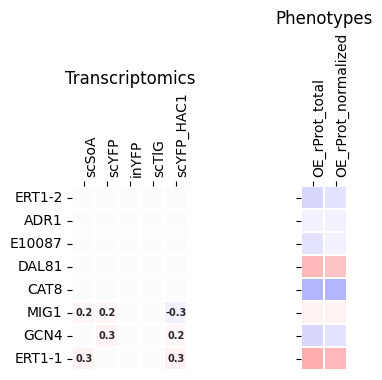

In [14]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns


# Define the numeric data and row labels
numeric_data1 = nutrient.iloc[:, 4:9]
numeric_data2 = nutrient.iloc[:, 9:11]

row_labels = [gene if assigned_name == '-' else assigned_name 
              for assigned_name, gene in zip(nutrient['Assigned name'], nutrient['Gene'])]

# Create a custom colormap
colors = ['blue', 'white', 'red']
cmap = LinearSegmentedColormap.from_list('custom_cmap', colors, N=100)

annot_kws = {"size": 7, "weight": "bold"}


# Create the figure and axes
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(5.2, 3.9), sharey=True)

# Plot the first heatmap
annot_data1 = numeric_data1.map(lambda x: f'{x:.1f}' if x != 0 else '')

# Create a blank annotation matrix for numeric_data2
annot_data2 = pd.DataFrame('', index=numeric_data2.index, columns=numeric_data2.columns)

# Specify annotations for chosen variants
annotations2 = {
    'OE_rProt_total': ['TF003', 'TF037', 'TF068', 'TF119', 'TF121', 'TF124', 'TF126', 'TF128'],
    'OE_rProt_normalized': ['TF037', 'TF068', 'TF121', 'TF124', 'TF126', 'TF128'],
}

# Add annotations based on specified genes
for column, genes in annotations2.items():
    for gene in genes:
        if gene in nutrient['TF number'].values:
            annot_data2.loc[nutrient['TF number'] == gene, column] = numeric_data2.loc[nutrient['TF number'] == gene, column].apply(lambda x: f'{x:.1f}')


sns.heatmap(numeric_data1, ax=ax1, yticklabels=row_labels, cmap=cmap, center=0, cbar=False, 
            linewidths=0.05, square=True, annot=annot_data1, fmt='', annot_kws=annot_kws,
            vmin=-4.5, vmax=6, cbar_kws={'format': '%.1f'})
ax1.xaxis.tick_top()
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha='left')
ax1.set_title('Transcriptomics')

# Plot the second heatmap
sns.heatmap(numeric_data2, ax=ax2, yticklabels=row_labels, cmap=cmap, center=1, cbar=False, 
            linewidths=0.05, square=True, annot=annot_data2, fmt='', annot_kws=annot_kws,
            vmin=0, vmax=2, cbar_kws={'format': '%.1f'})
ax2.xaxis.tick_top()
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha='left')
ax2.set_title('Phenotypes')

# Adjust the layout
plt.tight_layout()
#plt.savefig('subheatmap_nutrient_wo_KO.png')
